In [1]:
#importing all the necesasry libraries 
import glob
from keras.models import Sequential, load_model
import numpy as np
import pandas as pd
from keras.layers import Dense
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
import matplotlib.pyplot as plt
import keras as k
  

In [2]:
#loading the dataset
df=pd.read_csv('kidney_disease.csv')
df.head()

,id,age,bp,sg,al,su,rbc,pc,pcc,ba,...,pcv,wc,rc,htn,dm,cad,appet,pe,ane,classification
0,0,48.0,80.0,1.020,1.0,0.0,NaN,normal,notpresent,notpresent,...,44,7800,5.2,yes,yes,no,good,no,no,ckd
1,1,7.0,50.0,1.020,4.0,0.0,NaN,normal,notpresent,notpresent,...,38,6000,NaN,no,no,no,good,no,no,ckd
2,2,62.0,80.0,1.010,2.0,3.0,normal,normal,notpresent,notpresent,...,31,7500,NaN,no,yes,no,poor,no,yes,ckd
3,3,48.0,70.0,1.005,4.0,0.0,normal,abnormal,present,notpresent,...,32,6700,3.9,yes,no,no,poor,yes,yes,ckd
4,4,51.0,80.0,1.010,2.0,0.0,normal,normal,notpresent,notpresent,...,35,7300,4.6,no,no,no,good,no,no,ckd


In [3]:
#Checking for null values
df.isnull().sum() 

id                  0
age                 9
bp                 12
sg                 47
al                 46
su                 49
rbc               152
pc                 65
pcc                 4
ba                  4
bgr                44
bu                 19
sc                 17
sod                87
pot                88
hemo               52
pcv                70
wc                105
rc                130
htn                 2
dm                  2
cad                 2
appet               1
pe                  1
ane                 1
classification      0
dtype: int64

In [75]:
#filling the missing values with NaN#
#df.replace(0,np.nan,inplace=True)
#df
df.shape

(400, 26)

In [55]:
#Checking what percentage of each column data is missing
df.isnull().sum()/len(df)

id                0.0025
age               0.0225
bp                0.0300
sg                0.1175
al                0.6125
su                0.8475
rbc               0.3800
pc                0.1625
pcc               0.0100
ba                0.0100
bgr               0.1100
bu                0.0475
sc                0.0425
sod               0.2175
pot               0.2200
hemo              0.1300
pcv               0.1750
wc                0.2625
rc                0.3250
htn               0.0050
dm                0.0050
cad               0.0050
appet             0.0025
pe                0.0025
ane               0.0025
classification    0.0000
dtype: float64

In [ ]:
#As we can see , The percentage of missing values are very less
#however, since rbc, and rc has 38% and 32% missing data respectively, we are removing those columns


In [65]:
#df=df.drop('rbc',axis=1)
#df=df.drop('rc',axis=1)
#df

In [56]:
#giving shape of the data( get the number of rows and colums)

df.shape #400 patients and 25 different attributes

(400, 26)

In [66]:
#now describing the dataset
df.describe()


,id,age,bp,sg,al,su,bgr,bu,sc,sod,pot,hemo
count,400.000000,391.000000,388.000000,353.000000,354.000000,351.000000,356.000000,381.000000,383.000000,313.000000,312.000000,348.000000
mean,199.500000,51.483376,76.469072,1.017408,1.016949,0.450142,148.036517,57.425722,3.072454,137.528754,4.627244,12.526437
std,115.614301,17.169714,13.683637,0.005717,1.352679,1.099191,79.281714,50.503006,5.741126,10.408752,3.193904,2.912587
min,0.000000,2.000000,50.000000,1.005000,0.000000,0.000000,22.000000,1.500000,0.400000,4.500000,2.500000,3.100000
25%,99.750000,42.000000,70.000000,1.010000,0.000000,0.000000,99.000000,27.000000,0.900000,135.000000,3.800000,10.300000
50%,199.500000,55.000000,80.000000,1.020000,0.000000,0.000000,121.000000,42.000000,1.300000,138.000000,4.400000,12.650000
75%,299.250000,64.500000,80.000000,1.020000,2.000000,0.000000,163.000000,66.000000,2.800000,142.000000,4.900000,15.000000
max,399.000000,90.000000,180.000000,1.025000,5.000000,5.000000,490.000000,391.000000,76.000000,163.000000,47.000000,17.800000


In [ ]:
#Now detecting Outliers
#by visualizing the Data distribution
#import seaborn as sns
#with sns.axes_style('darkgrid'):
 #   sns.displot(df['classification'])

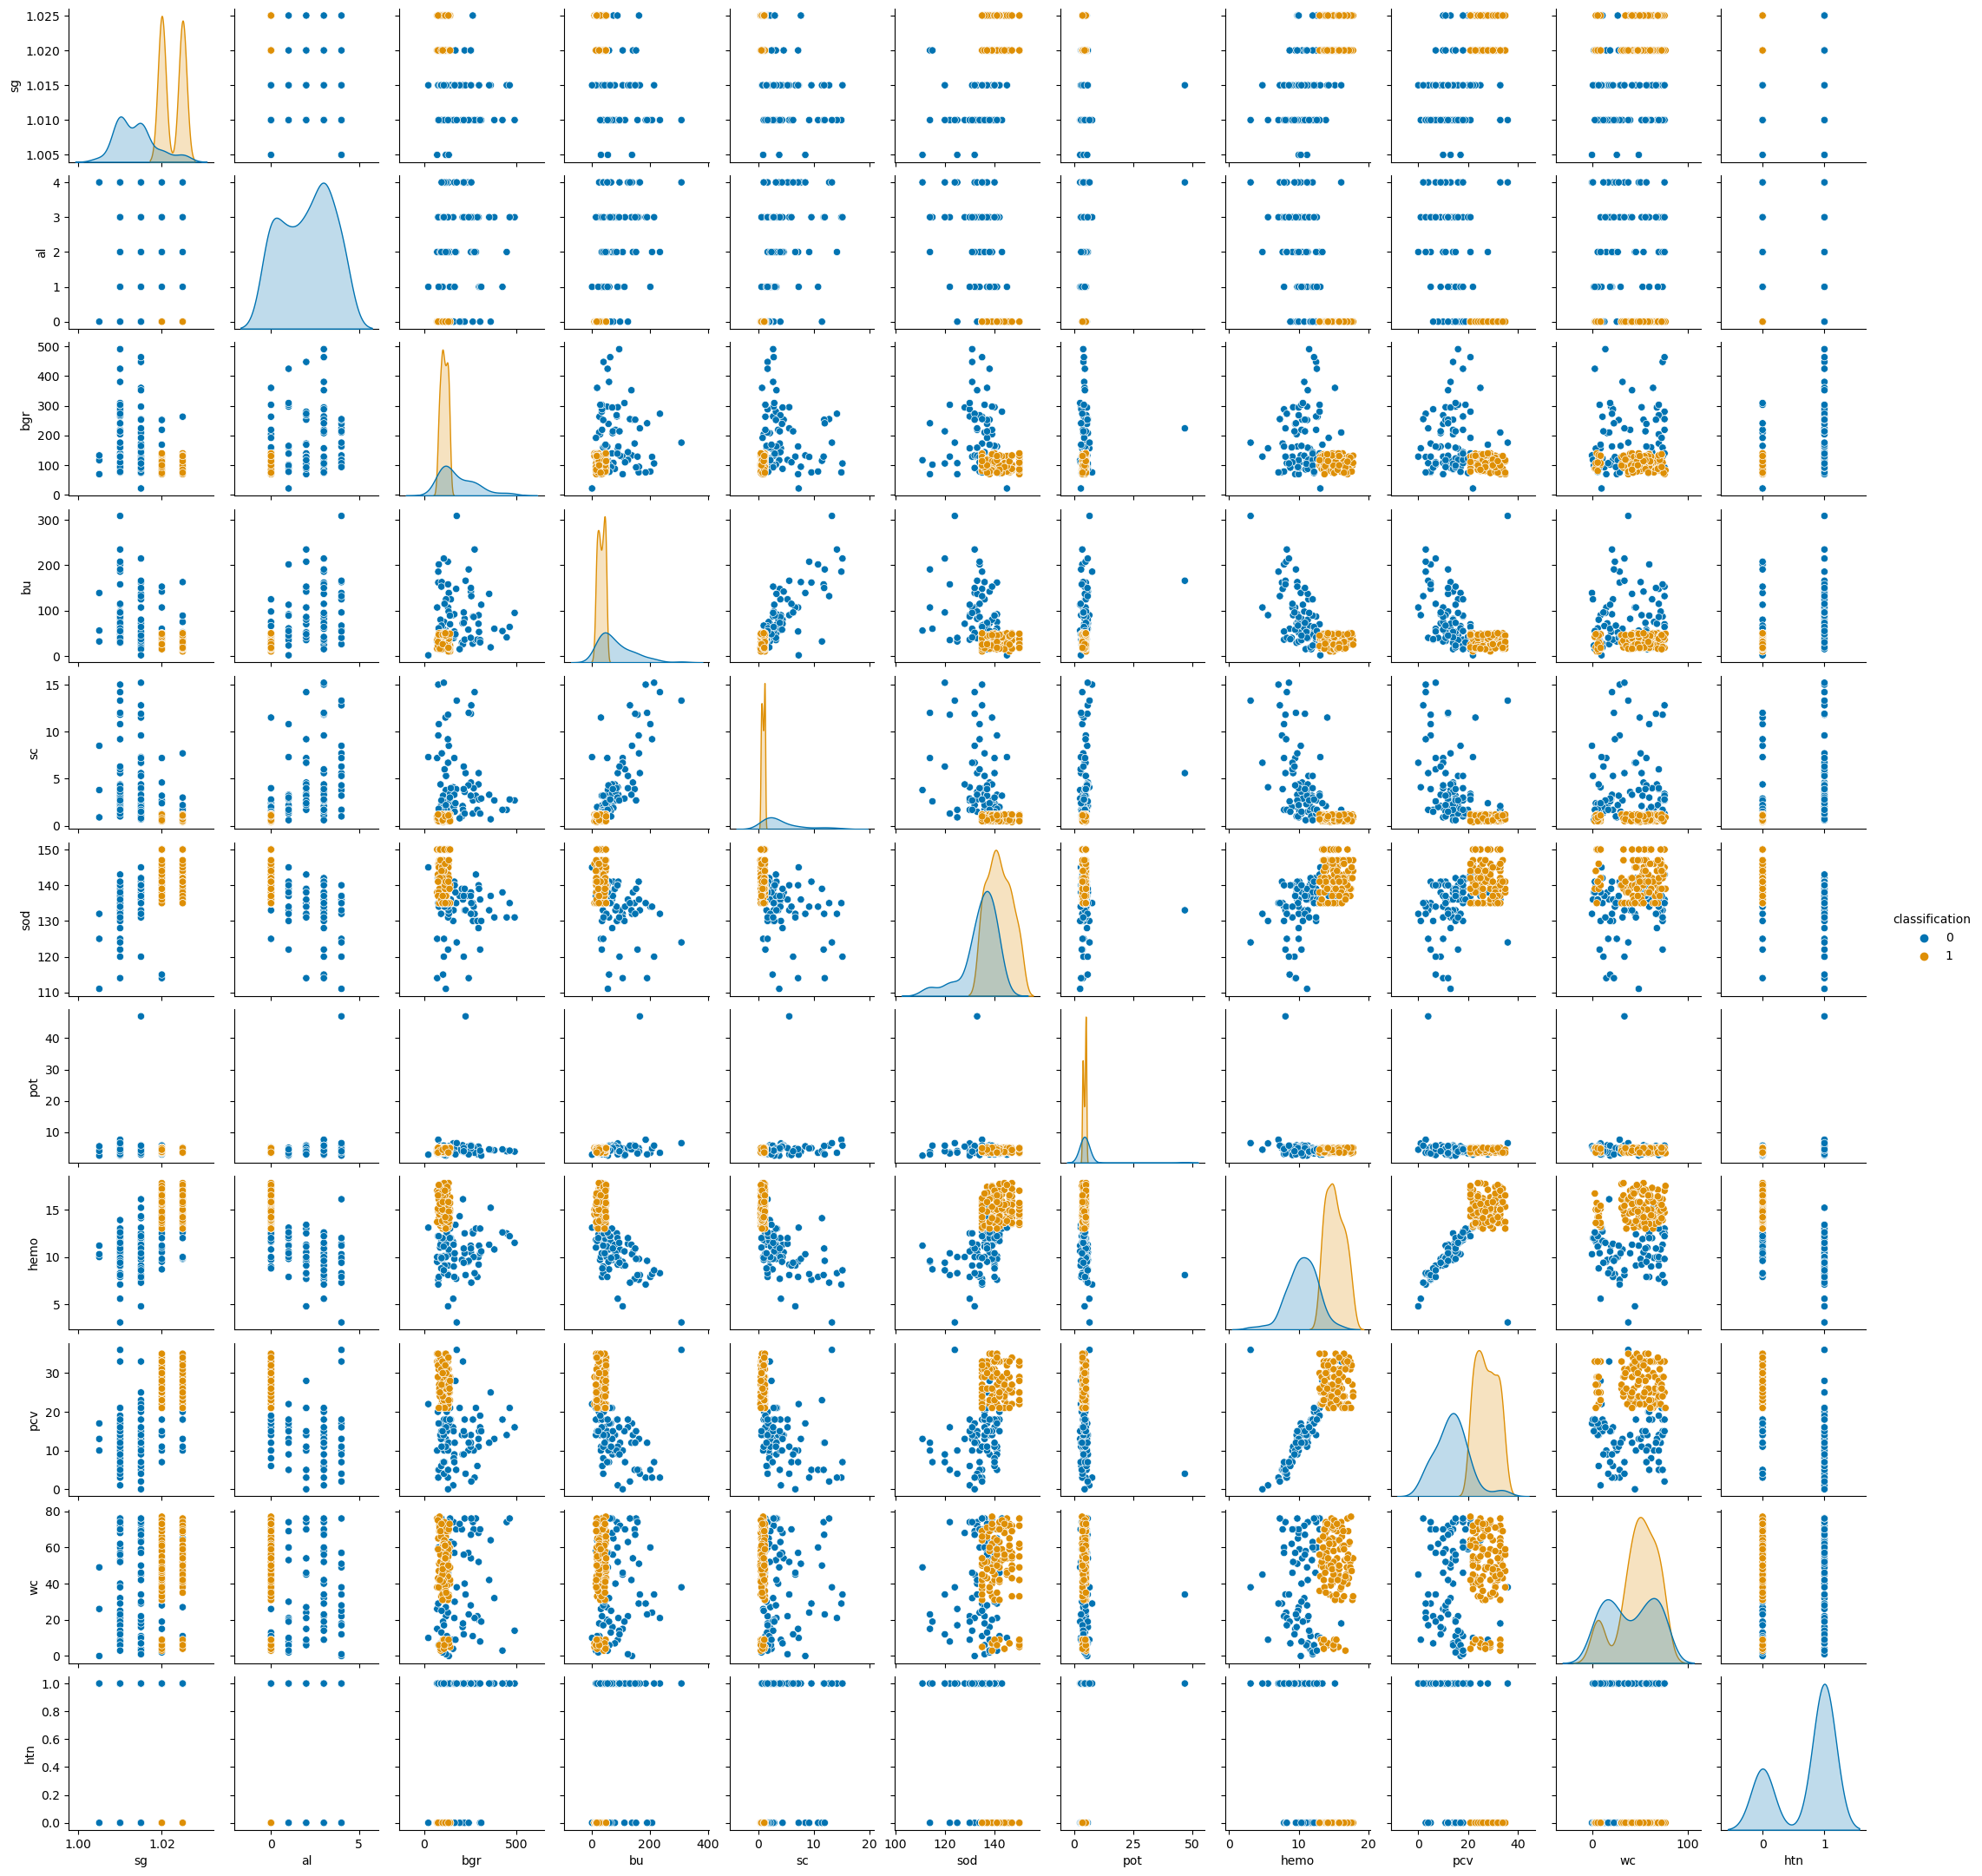

In [157]:
import seaborn as sns
sns.pairplot(df, hue='classification',height=2,palette='colorblind')

In [130]:
#List of the colums we want to keep

columns_to_retain=["sg","al","bgr","bu","sc","sod","pot","hemo","pcv","wc","htn","classification"]
#Drop the columns that are not in columns_to_retain
df=df.drop( [col for col in df.columns if not col in columns_to_retain],axis=1)
 
#drop the rows with NA or missing values
df = df.dropna(axis=0)


In [131]:
#transform the non-numeric data in the columns
#for that we need to go thourgh every singel columns and identify every column that doesnt contain number, 
#if there is a column that is non numeric we transform it to numeric values

for column in df.columns:
    
    if df[column].dtype == np.number:
        continue
    else:
        
        df[column] = LabelEncoder().fit_transform( df[column] )
    


C:\Users\IT\AppData\Local\Temp\ipykernel_8664\1716391802.py:7: DeprecationWarning: Converting `np.inexact` or `np.floating` to a dtype is deprecated. The current result is `float64` which is not strictly correct.
  if df[column].dtype == np.number:


In [132]:
df.head(20)

,sg,al,bgr,bu,sc,sod,pot,hemo,pcv,wc,htn,classification
3,1.005,4.0,117.0,56.0,3.8,111.0,2.5,11.2,13,49,1,0
5,1.015,3.0,74.0,25.0,1.1,142.0,3.2,12.2,20,59,1,0
9,1.020,2.0,70.0,107.0,7.2,114.0,3.7,9.5,10,15,1,0
11,1.010,3.0,380.0,60.0,2.7,131.0,4.2,10.8,13,32,1,0
12,1.015,3.0,208.0,72.0,2.1,138.0,5.8,9.7,9,16,1,0
14,1.010,3.0,157.0,90.0,4.1,130.0,6.4,5.6,1,9,1,0
15,1.015,3.0,76.0,162.0,9.6,141.0,4.9,7.6,5,29,1,0
18,1.025,0.0,263.0,27.0,1.3,135.0,4.3,12.7,18,11,1,0
20,1.015,2.0,173.0,148.0,3.9,135.0,5.2,7.7,5,70,1,0
22,1.025,4.0,95.0,163.0,7.7,136.0,3.8,9.8,13,51,1,0


In [133]:
#Splitting the dataset into training(X-features) and testing (y-target)
X= df.drop(['classification'],axis=1) #removing the classification feature and makign sure the rest of the feature are x

y= df['classification']
 

In [134]:
#feature scaling
#using min max methood
#wchih scales teh datset lyhing between 0 and 1

x_scaler = MinMaxScaler()
x_scaler.fit(X)
column_names =X.columns
X[column_names]= x_scaler.transform(X)

In [135]:
 #splitting the dataset into 80% training and 20% testing

X_train,X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, shuffle=True)

In [136]:
#Building the ANN model using sequential
model= Sequential()
model.add(Dense(256,input_dim=len(X.columns),kernel_initializer=k.initializers.random_normal(seed=13), activation='relu'))
model.add(Dense(1,activation='sigmoid'))


In [137]:
#compiling the ANN model
#the loss function measures how well the model does in training and 
#and then tries to improve on it by optimizer
model.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])#this is a function used for binary class or two classes


In [138]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report


In [139]:
#Training the model
history= model.fit(X_train,y_train, epochs=500,batch_size=X_train.shape[0])


Epoch 1/500
1/1 [==============================] - 1s 848ms/step - loss: 0.7125 - accuracy: 0.3373
Epoch 2/500
1/1 [==============================] - 0s 8ms/step - loss: 0.6955 - accuracy: 0.3373
Epoch 3/500
1/1 [==============================] - 0s 8ms/step - loss: 0.6791 - accuracy: 0.8402
Epoch 4/500
1/1 [==============================] - 0s 8ms/step - loss: 0.6634 - accuracy: 0.8521
Epoch 5/500
1/1 [==============================] - 0s 20ms/step - loss: 0.6484 - accuracy: 0.8343
Epoch 6/500
1/1 [==============================] - 0s 9ms/step - loss: 0.6341 - accuracy: 0.8225
Epoch 7/500
1/1 [==============================] - 0s 8ms/step - loss: 0.6205 - accuracy: 0.8166
Epoch 8/500
1/1 [==============================] - 0s 8ms/step - loss: 0.6075 - accuracy: 0.8107
Epoch 9/500
1/1 [==============================] - 0s 13ms/step - loss: 0.5951 - accuracy: 0.8107
Epoch 10/500
1/1 [==============================] - 0s 9ms/step - loss: 0.5831 - accuracy: 0.8047
Epoch 11/500
1/1 [=======

1/1 [==============================] - 0s 6ms/step - loss: 0.0896 - accuracy: 0.9586
Epoch 167/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0891 - accuracy: 0.9586
Epoch 168/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0886 - accuracy: 0.9586
Epoch 169/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0880 - accuracy: 0.9645
Epoch 170/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0875 - accuracy: 0.9645
Epoch 171/500
1/1 [==============================] - 0s 6ms/step - loss: 0.0870 - accuracy: 0.9645
Epoch 172/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0865 - accuracy: 0.9645
Epoch 173/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0860 - accuracy: 0.9645
Epoch 174/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0855 - accuracy: 0.9645
Epoch 175/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0850 - accuracy: 0.9645
Epoch 176/500
1/1 [=

1/1 [==============================] - 0s 12ms/step - loss: 0.0375 - accuracy: 0.9941
Epoch 331/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0373 - accuracy: 0.9941
Epoch 332/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0371 - accuracy: 0.9941
Epoch 333/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0370 - accuracy: 0.9941
Epoch 334/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0368 - accuracy: 0.9941
Epoch 335/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0366 - accuracy: 0.9941
Epoch 336/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0364 - accuracy: 0.9941
Epoch 337/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0362 - accuracy: 0.9941
Epoch 338/500
1/1 [==============================] - 0s 11ms/step - loss: 0.0361 - accuracy: 0.9941
Epoch 339/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0359 - accuracy: 0.9941
Epoch 340/500
1/1 [

1/1 [==============================] - 0s 10ms/step - loss: 0.0182 - accuracy: 1.0000
Epoch 495/500
1/1 [==============================] - 0s 7ms/step - loss: 0.0181 - accuracy: 1.0000
Epoch 496/500
1/1 [==============================] - 0s 9ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 497/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0180 - accuracy: 1.0000
Epoch 498/500
1/1 [==============================] - 0s 12ms/step - loss: 0.0179 - accuracy: 1.0000
Epoch 499/500
1/1 [==============================] - 0s 8ms/step - loss: 0.0178 - accuracy: 1.0000
Epoch 500/500
1/1 [==============================] - 0s 10ms/step - loss: 0.0178 - accuracy: 1.0000


In [140]:
#SAVING THE MODEL
model.save('ckd.model')

INFO:tensorflow:Assets written to: ckd.model\assets


Text(0.5, 0, 'epoch')

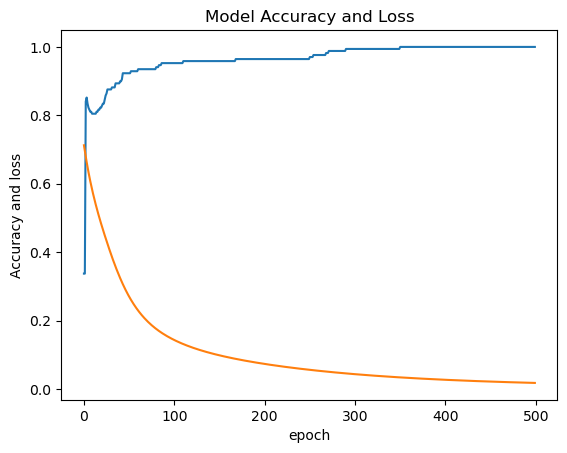

In [141]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['loss'])
plt.title('Model Accuracy and Loss')
plt.ylabel('Accuracy and loss')
plt.xlabel('epoch')

In [142]:
print("shape of training data:",X_train.shape)
print("shape of testing data:", X_test.shape )

shape of training data: (169, 11)
shape of testing data: (43, 11)


In [143]:
#How well our model predicts and diagonosis models
pred= model.predict(X_test)
pred= [1 if y>=0.5 else 0 for y in pred]

pred

2/2 [==============================] - 0s 4ms/step


[1,
 1,
 1,
 0,
 1,
 0,
 1,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 1,
 1,
 0,
 0,
 1,
 0,
 1,
 1,
 1,
 0,
 1]

In [144]:

print("original values :{0}".format(" ,".join(str(x) for x in y_test)))
print("predicted values :{0}".format(" ,".join(str(x) for x in pred)))


original values :1 ,1 ,1 ,0 ,1 ,0 ,1 ,0 ,0 ,1 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,1 ,1 ,0 ,1 ,1 ,1 ,0 ,0 ,1 ,1 ,1 ,0 ,0 ,1 ,0 ,1 ,1 ,1 ,0 ,1
predicted values :1 ,1 ,1 ,0 ,1 ,0 ,1 ,0 ,0 ,1 ,0 ,0 ,1 ,0 ,1 ,0 ,0 ,0 ,0 ,0 ,1 ,0 ,0 ,1 ,1 ,0 ,1 ,1 ,1 ,0 ,0 ,1 ,1 ,1 ,0 ,0 ,1 ,0 ,1 ,1 ,1 ,0 ,1


In [145]:
model_acc=accuracy_score(y_test,pred)
model_acc

1.0

In [146]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
print("classidication report:",classification_report(y_test,pred))#Clasification report of ANN

classidication report:               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        22

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [147]:

print(f"Test Accuracy of ANN is {model_acc} \n")

Test Accuracy of ANN is 1.0 



In [148]:
x_pred=model.predict(X_train)
x_pred

6/6 [==============================] - 0s 2ms/step


array([[1.73166100e-07],
       [4.80899814e-07],
       [1.82002804e-08],
       [9.75501716e-01],
       [1.02660072e-03],
       [9.90866184e-01],
       [9.86104488e-01],
       [9.45499241e-01],
       [9.93718266e-01],
       [2.74935388e-07],
       [9.95473862e-01],
       [9.95832860e-01],
       [9.99382615e-01],
       [9.55889881e-01],
       [9.98042583e-01],
       [5.35855058e-08],
       [2.15239683e-03],
       [9.99181926e-01],
       [1.13932250e-08],
       [9.99673605e-01],
       [9.81651962e-01],
       [9.95700598e-01],
       [9.99844968e-01],
       [2.68126268e-08],
       [9.93896008e-01],
       [3.28116039e-05],
       [9.99497354e-01],
       [9.91076469e-01],
       [9.76066887e-01],
       [2.24097967e-08],
       [2.42204177e-08],
       [9.99335885e-01],
       [1.63291785e-04],
       [9.99080539e-01],
       [9.97851789e-01],
       [1.47107765e-01],
       [9.93007302e-01],
       [9.88659143e-01],
       [9.95083094e-01],
       [5.88301674e-08],


In [149]:
from sklearn.neighbors import KNeighborsClassifier

In [150]:
knn=KNeighborsClassifier()
knn.fit(X_train,y_train )

knn_acc = accuracy_score(y_test, knn.predict(X_test))


print(f"Training Accuracy of KNN is {accuracy_score(y_train, knn.predict(X_train))}")
print(f"Test Accuracy of KNN is {knn_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, knn.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, knn.predict(X_test))}")


Training Accuracy of KNN is 0.9704142011834319
Test Accuracy of KNN is 1.0 

Confusion Matrix :- 
[[21  0]
 [ 0 22]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        22

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [151]:
#Using Decision Tree

from sklearn.tree import DecisionTreeClassifier

dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of decision tree

dtc_acc = accuracy_score(y_test, dtc.predict(X_test))

print(f"Training Accuracy of Decision Tree Classifier is {accuracy_score(y_train, dtc.predict(X_train))}")
print(f"Test Accuracy of Decision Tree Classifier is {dtc_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, dtc.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, dtc.predict(X_test))}")

Training Accuracy of Decision Tree Classifier is 1.0
Test Accuracy of Decision Tree Classifier is 1.0 

Confusion Matrix :- 
[[21  0]
 [ 0 22]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        22

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [152]:
#using Adabost

from sklearn.ensemble import AdaBoostClassifier

ada = AdaBoostClassifier(base_estimator = dtc)
ada.fit(X_train, y_train)

# accuracy score, confusion matrix and classification report of ada boost

ada_acc = accuracy_score(y_test, ada.predict(X_test))

print(f"Training Accuracy of Ada Boost Classifier is {accuracy_score(y_train, ada.predict(X_train))}")
print(f"Test Accuracy of Ada Boost Classifier is {ada_acc} \n")

print(f"Confusion Matrix :- \n{confusion_matrix(y_test, ada.predict(X_test))}\n")
print(f"Classification Report :- \n {classification_report(y_test, ada.predict(X_test))}")

Training Accuracy of Ada Boost Classifier is 1.0
Test Accuracy of Ada Boost Classifier is 1.0 

Confusion Matrix :- 
[[21  0]
 [ 0 22]]

Classification Report :- 
               precision    recall  f1-score   support

           0       1.00      1.00      1.00        21
           1       1.00      1.00      1.00        22

    accuracy                           1.00        43
   macro avg       1.00      1.00      1.00        43
weighted avg       1.00      1.00      1.00        43



In [153]:
models = pd.DataFrame({
    'Model' : [ 'KNN', 'Decision Tree Classifier','Ada Boost Classifier'],
    'Score' : [knn_acc, dtc_acc, ada_acc ]
})


models.sort_values(by = 'Score', ascending = False)

,Model,Score
0,KNN,1.0
1,Decision Tree Classifier,1.0
2,Ada Boost Classifier,1.0
